Author: Yang
Date: 04/22/2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
import os
import matplotlib
matplotlib.style.use('seaborn-paper')
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
%matplotlib inline

In [3]:
county_area = pd.read_csv(r"..\..\data\drought_monitor\county_area.csv")
county_area.head()
len(county_area.index)

3221

In [3]:
# comment out if using the updated results from Andy
# coeff = pd.read_csv(r"../../code/analysis_stage2/combined_inputs/combined_acs_epa_betas.csv ")
# coeff.rename(columns ={'countyID':'GISJOIN'},inplace = True)
# coeff.head()
# matching = [s for s in coeff.columns.values if "coeff" in s]
# matching

In [10]:
# use the updated results from Andy
combined = pd.DataFrame()
combined = county_area*1
matching = []
dirs = os.listdir('../../results/coefficients_stage1/updated')
for file in dirs:
    if 'ABTS' in file:
        coeff = pd.read_csv('../../results/coefficients_stage1/updated/%s'%file)
        coeff.rename(columns = {'countyID':'GISJOIN'},inplace = True)
        combined = combined.merge(coeff,on='GISJOIN',how ='outer')
        matching.append(coeff.columns.values[1])

In [11]:
len(combined.index)

3221

In [12]:
name = pd.read_csv('../../code/analysis_stage1/namesCombinedOrder.txt',sep ='"',header =None)
name_clean =name[[1,3,5,7,9]]
name_list = name_clean.as_matrix().reshape((name_clean.as_matrix().size,1)).tolist()

13


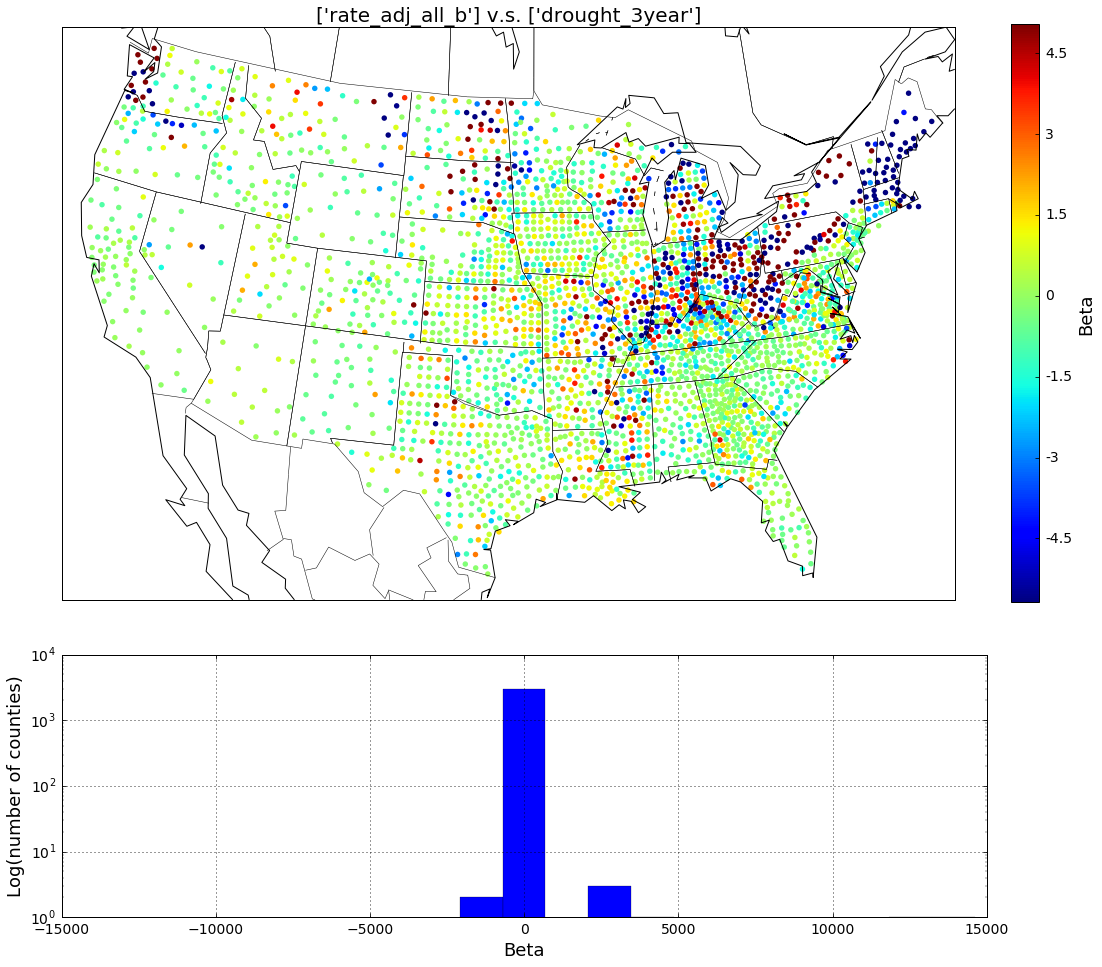

14


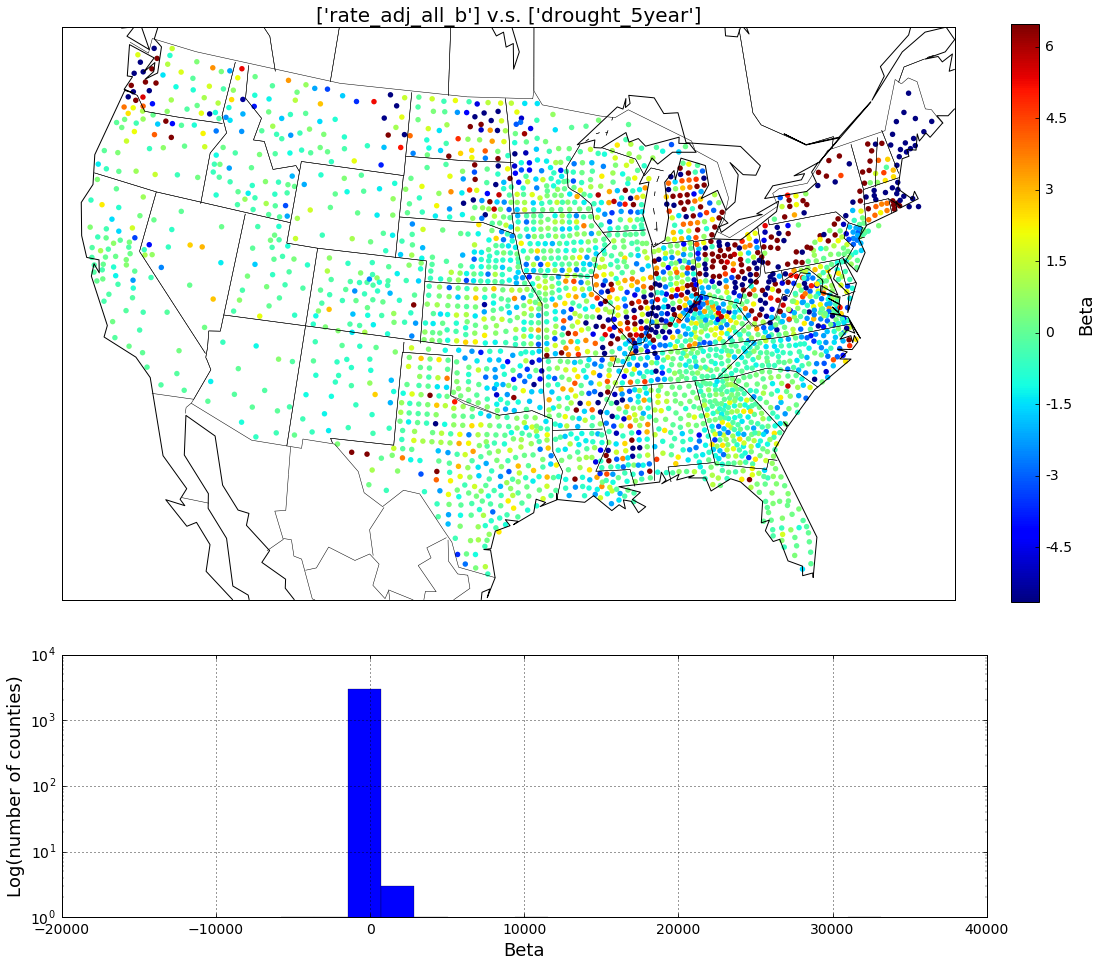

15


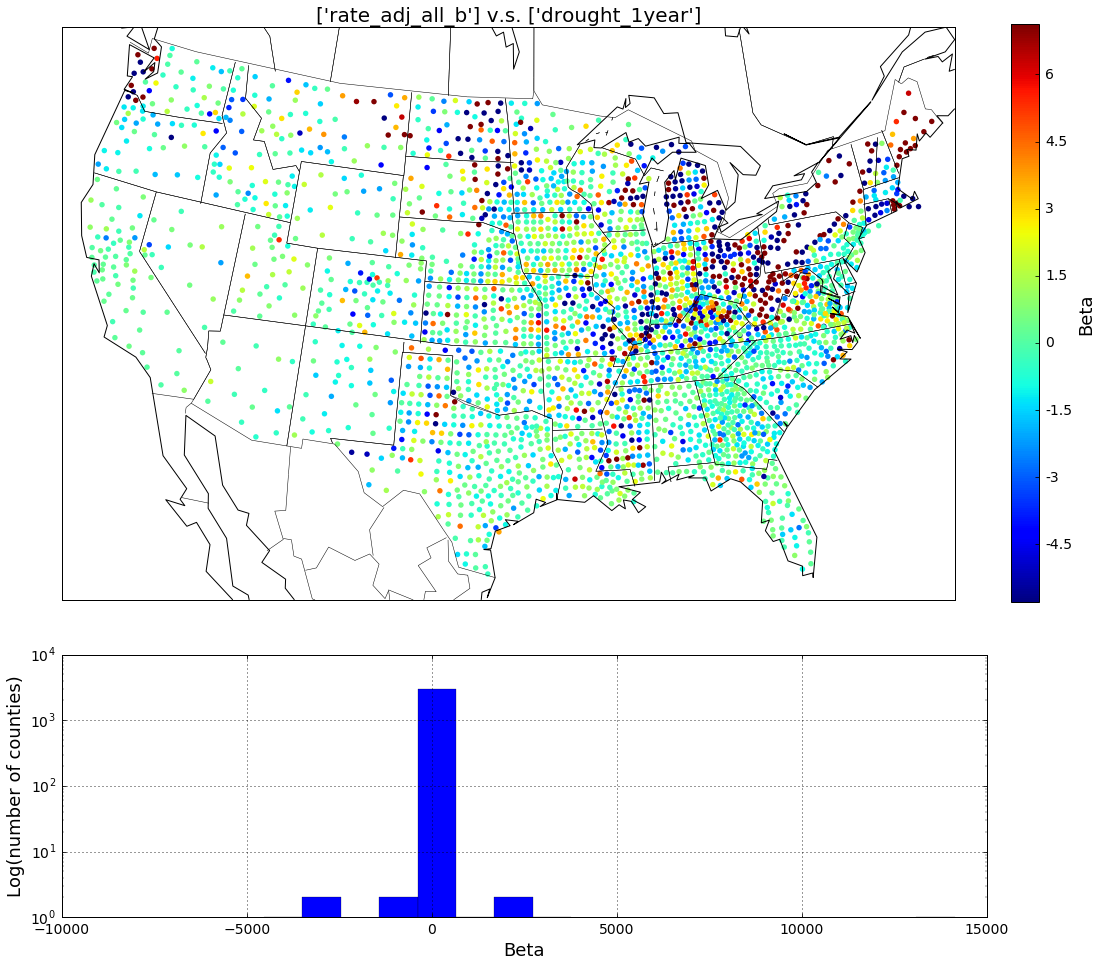

13


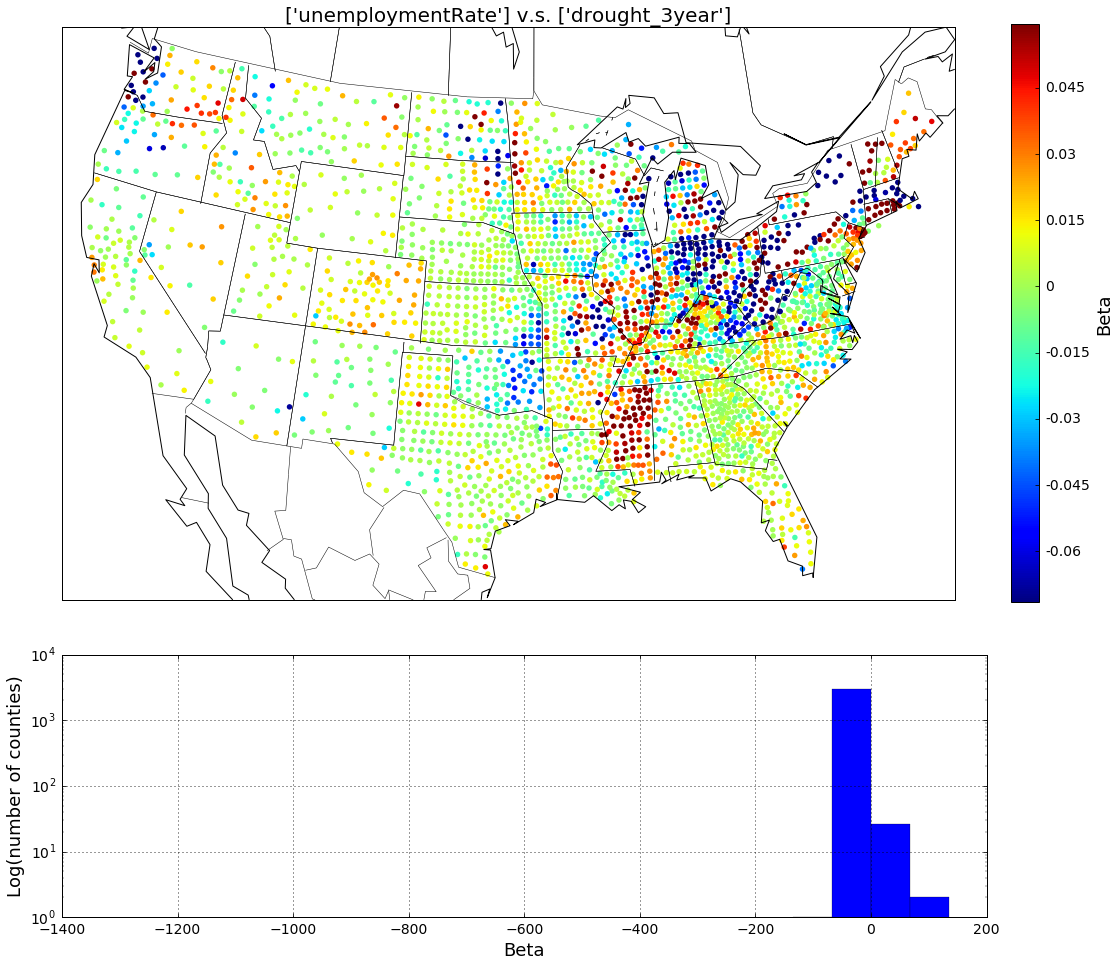

14


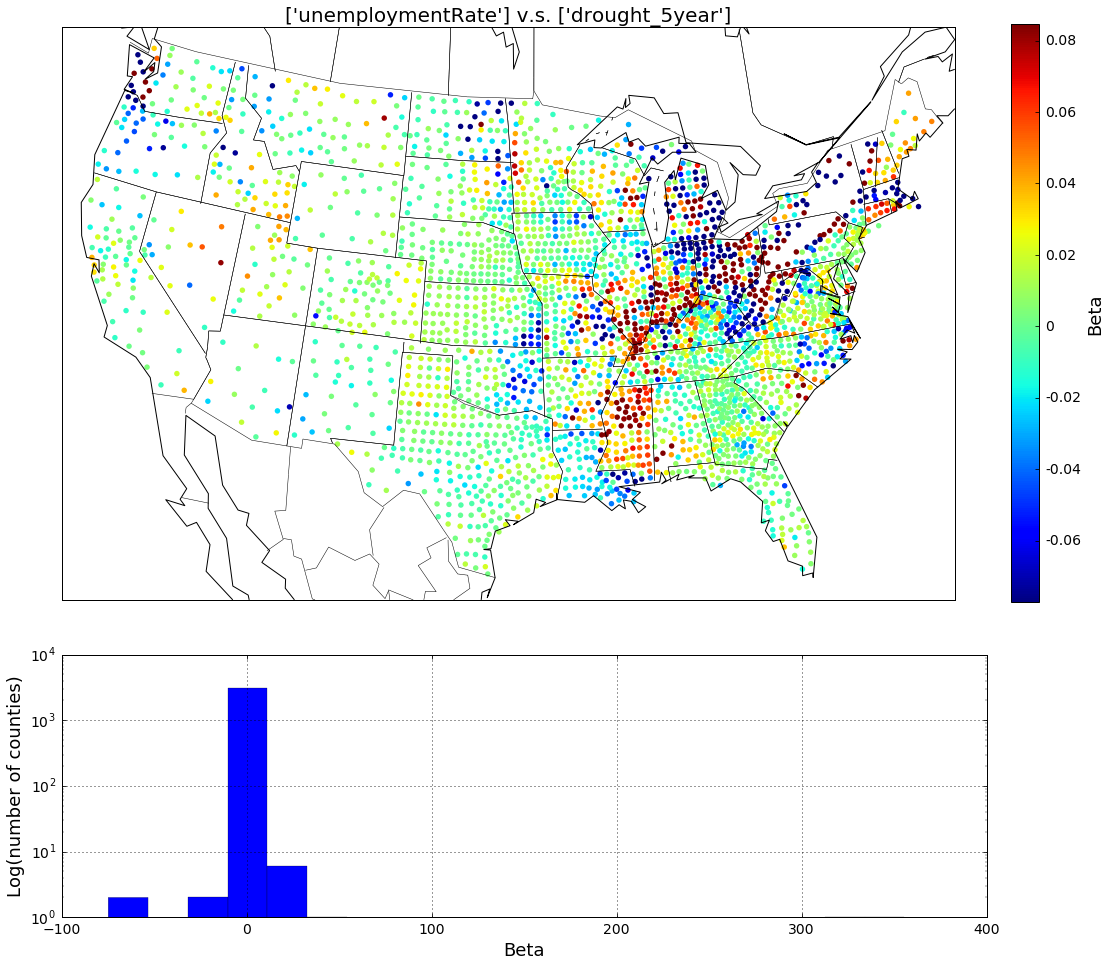

15


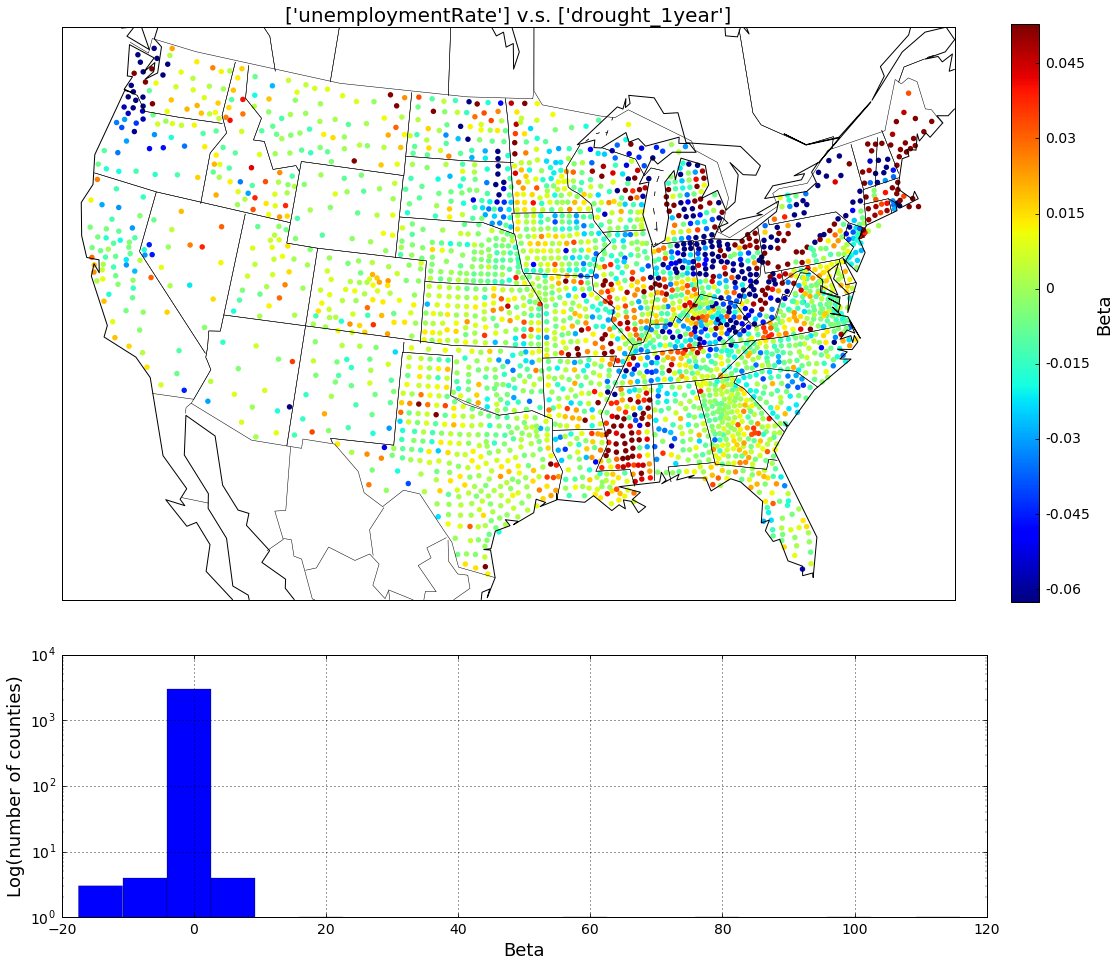

13


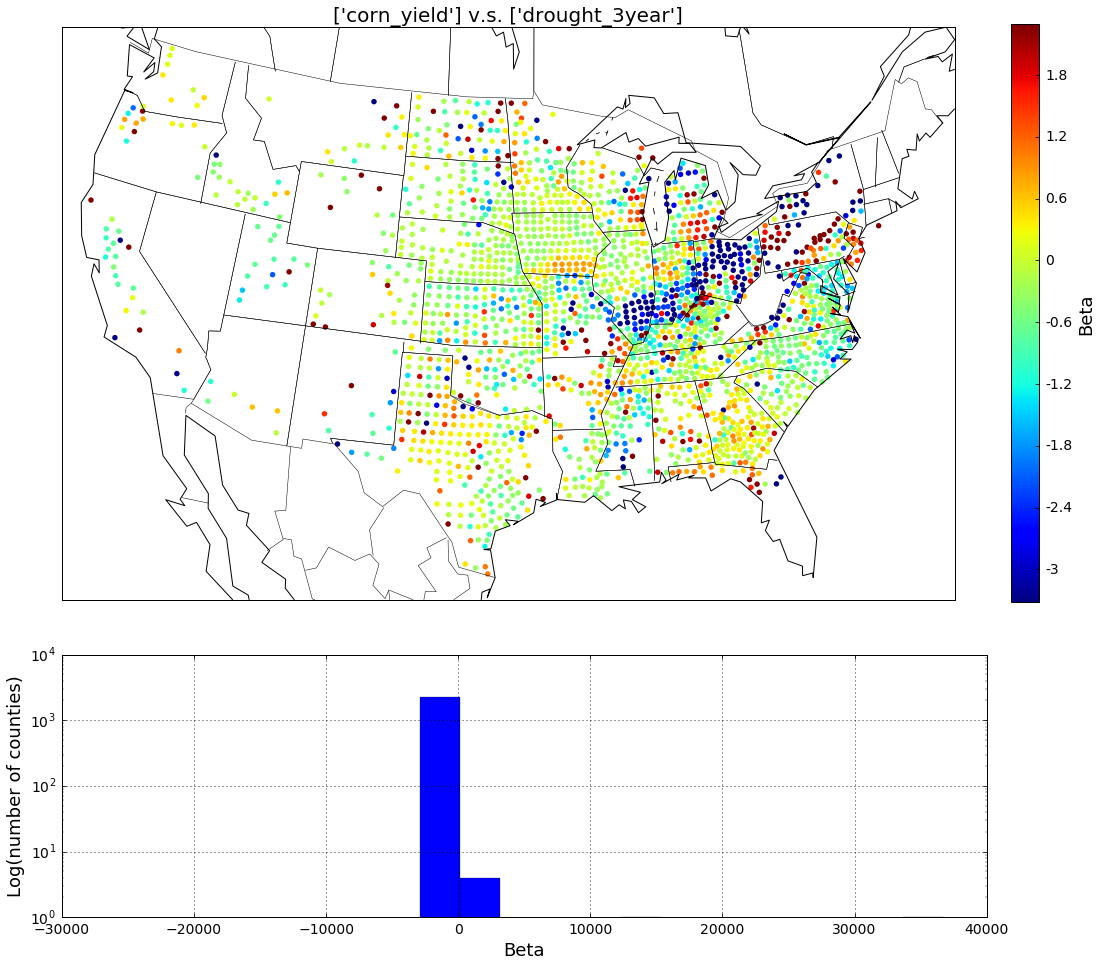

14


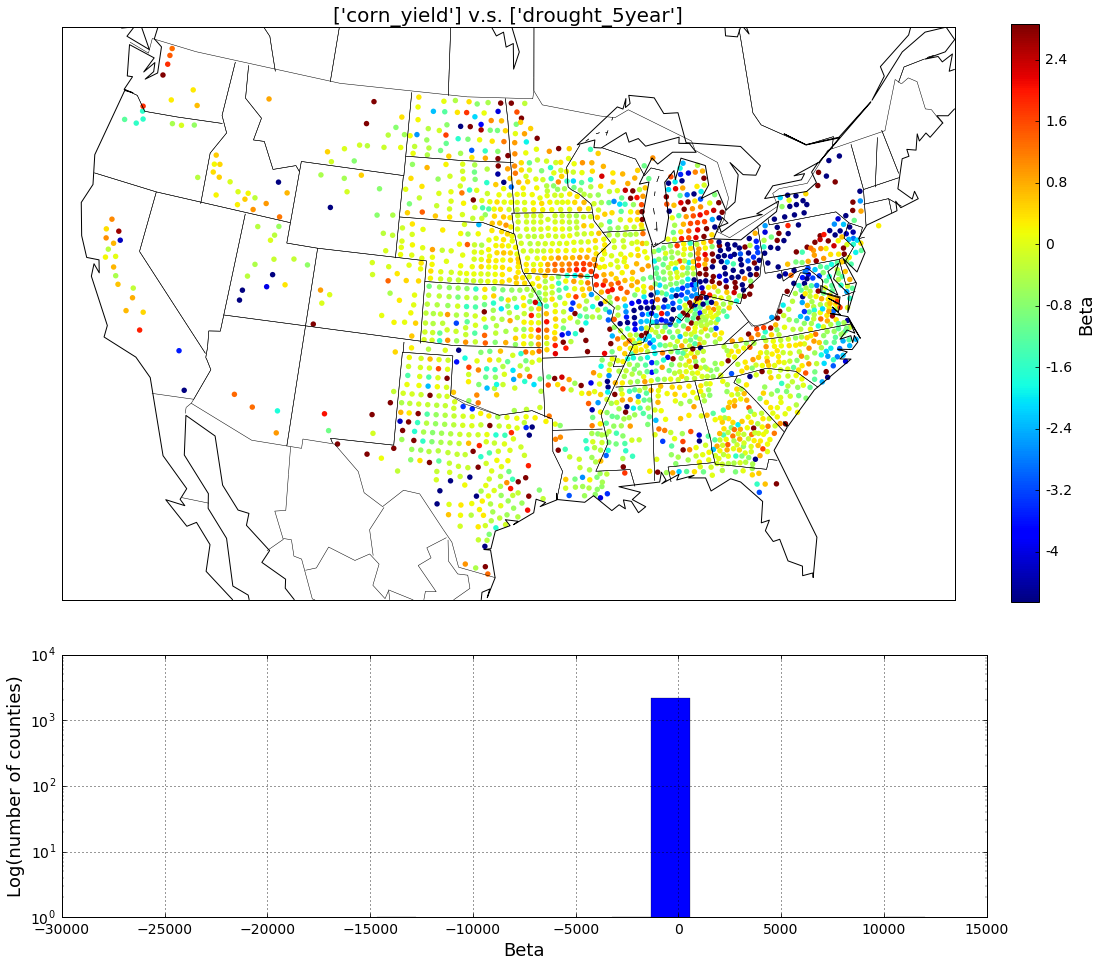

15


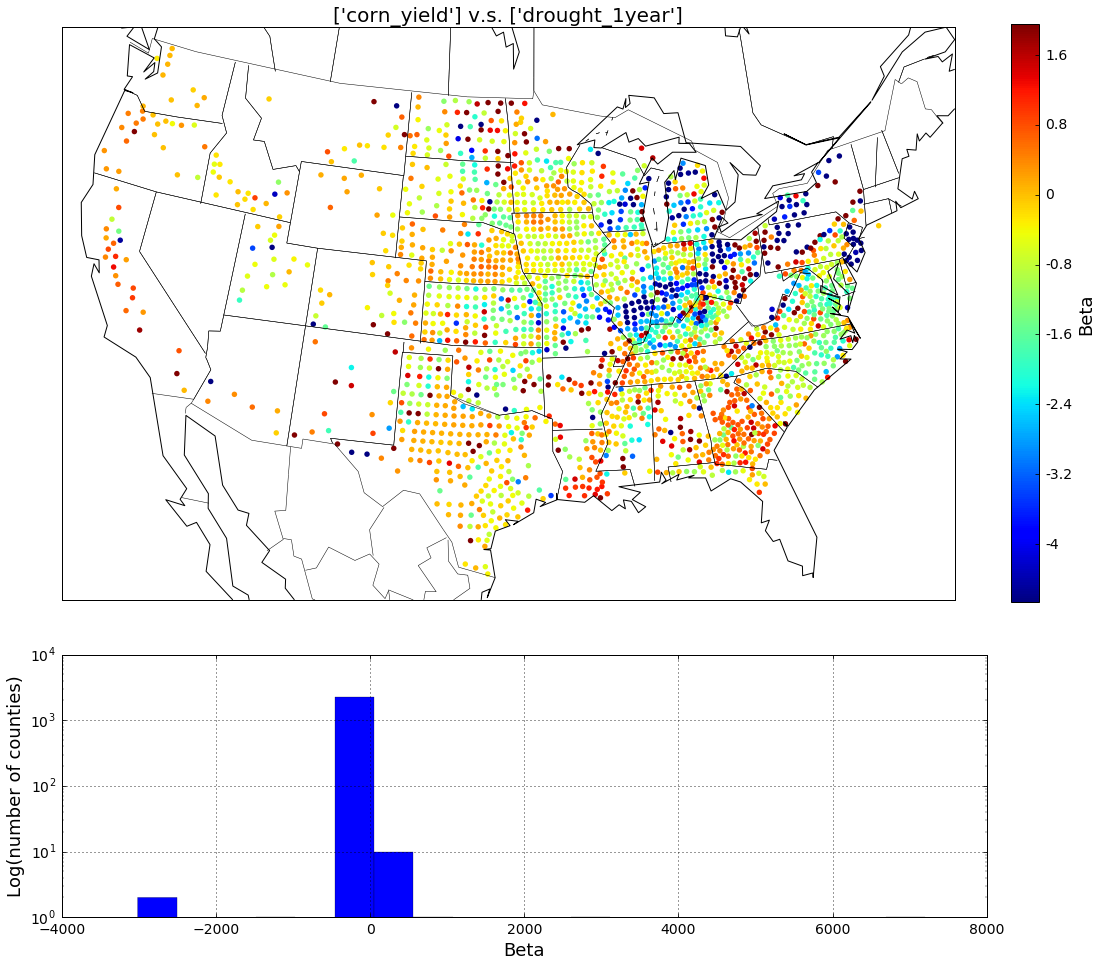

13


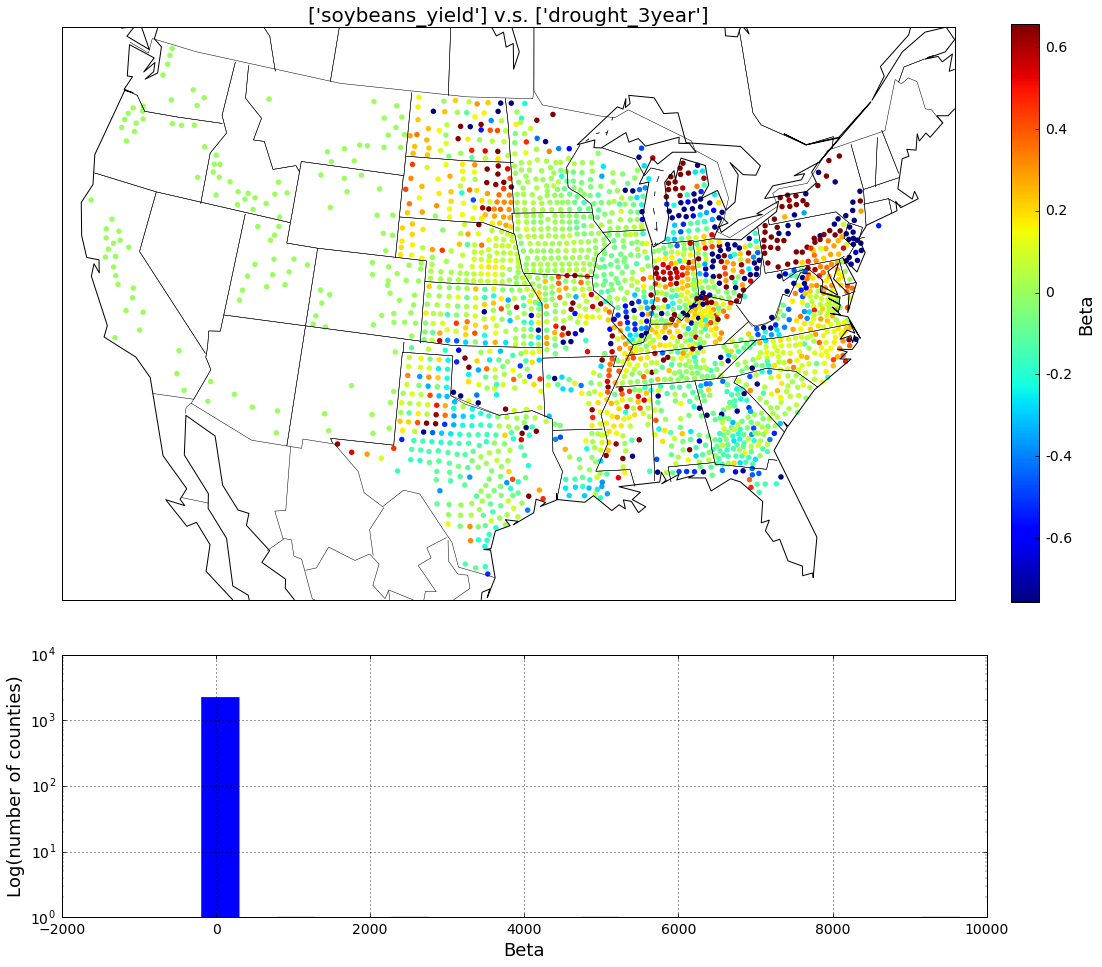

14


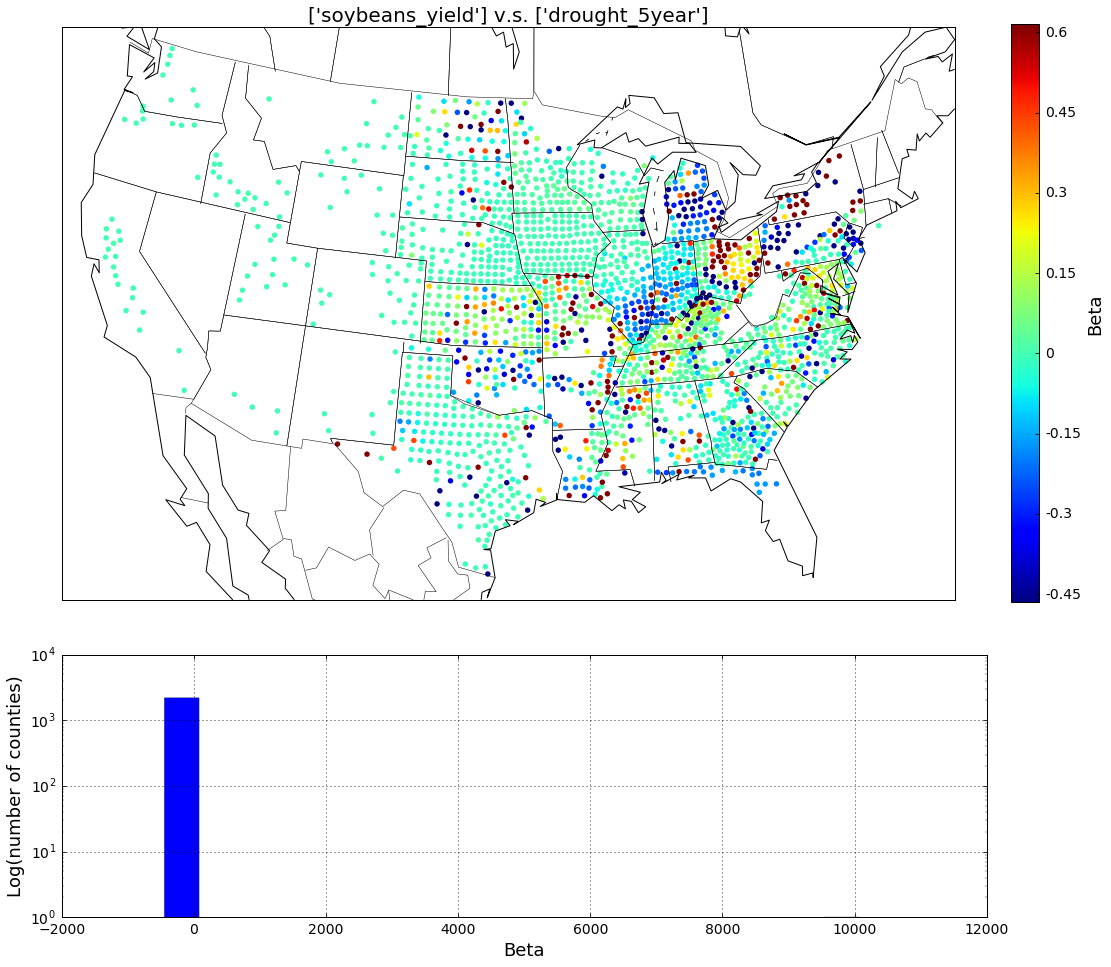

15


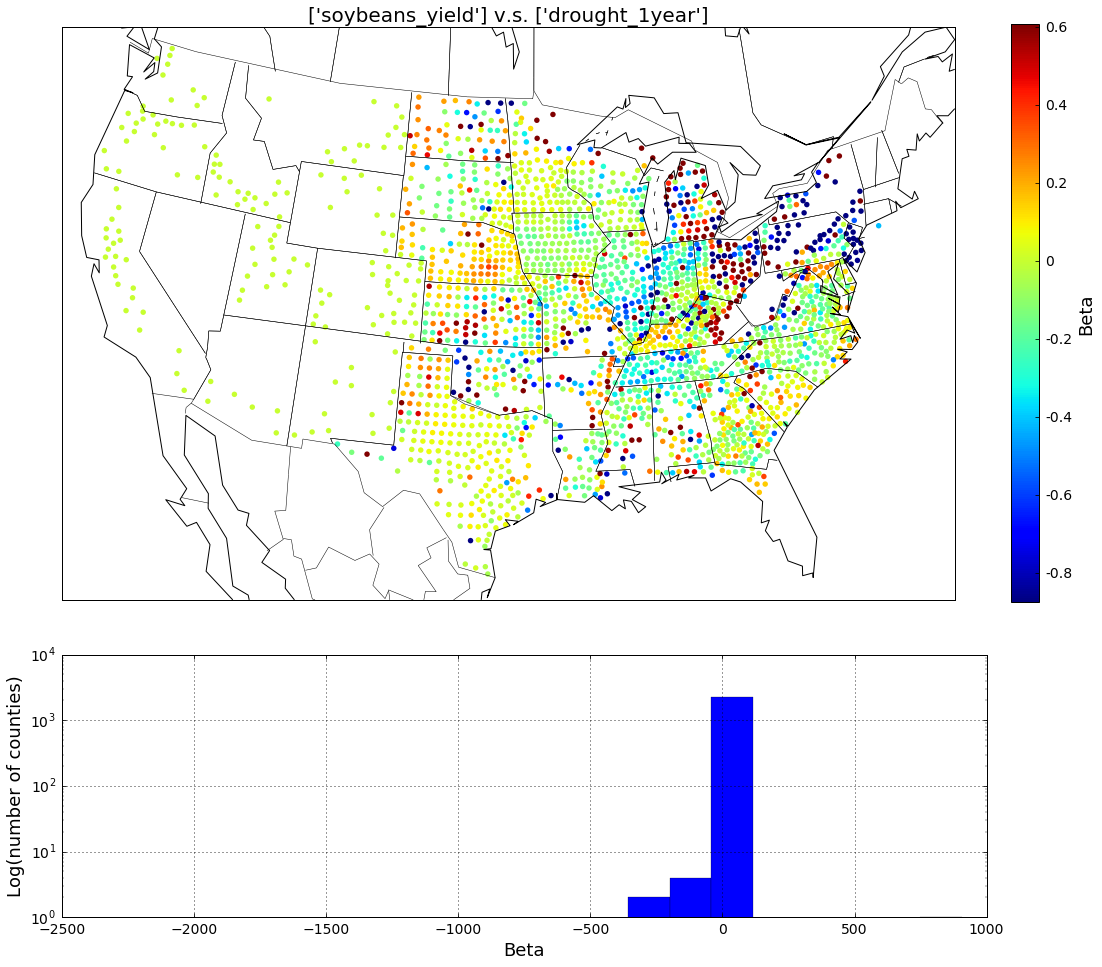

13


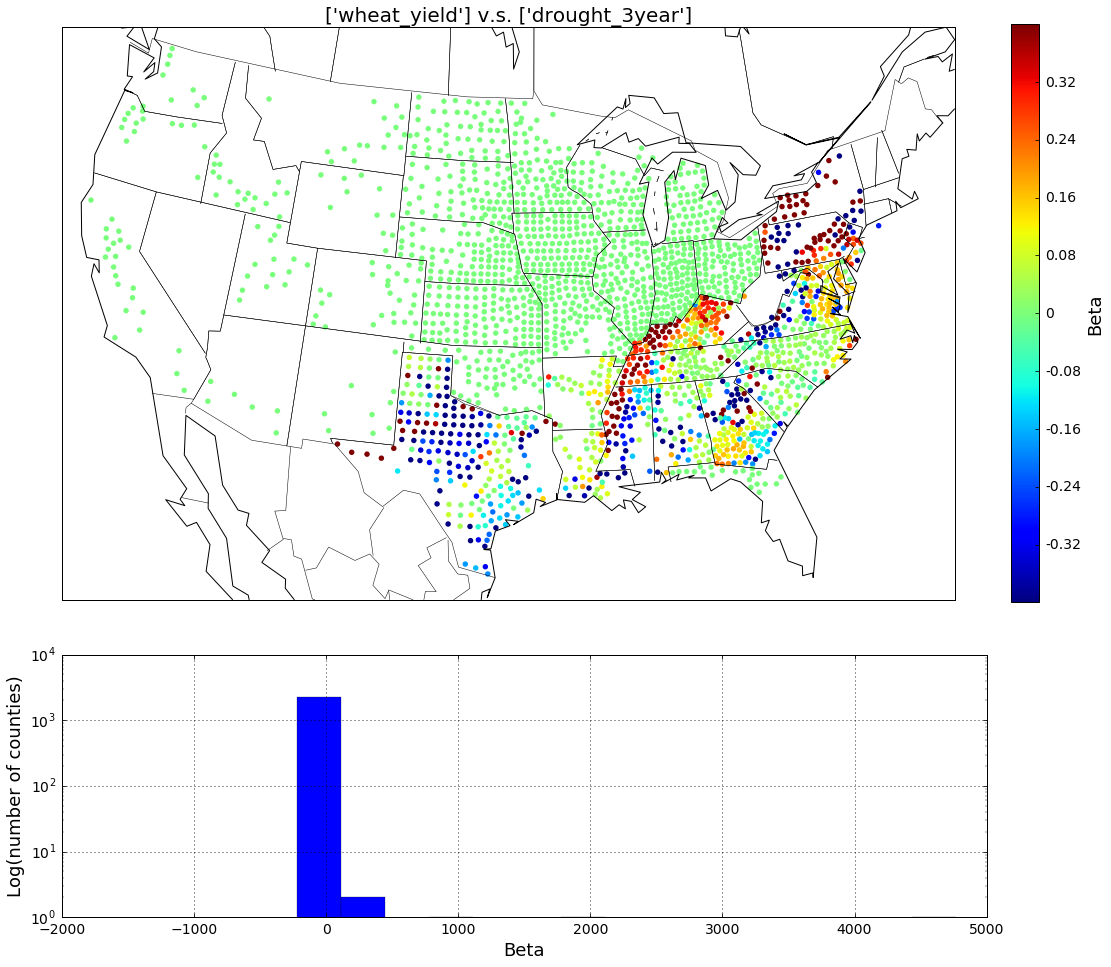

14


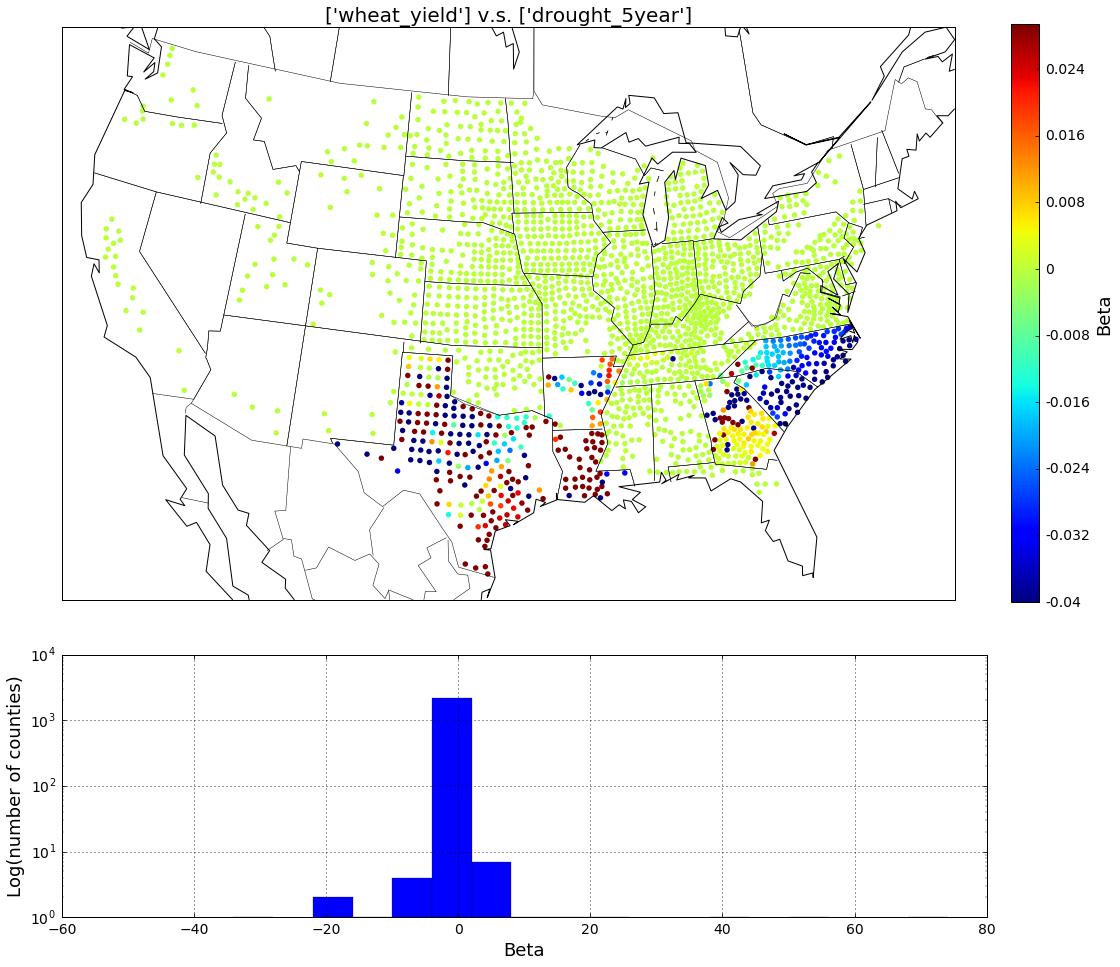

15


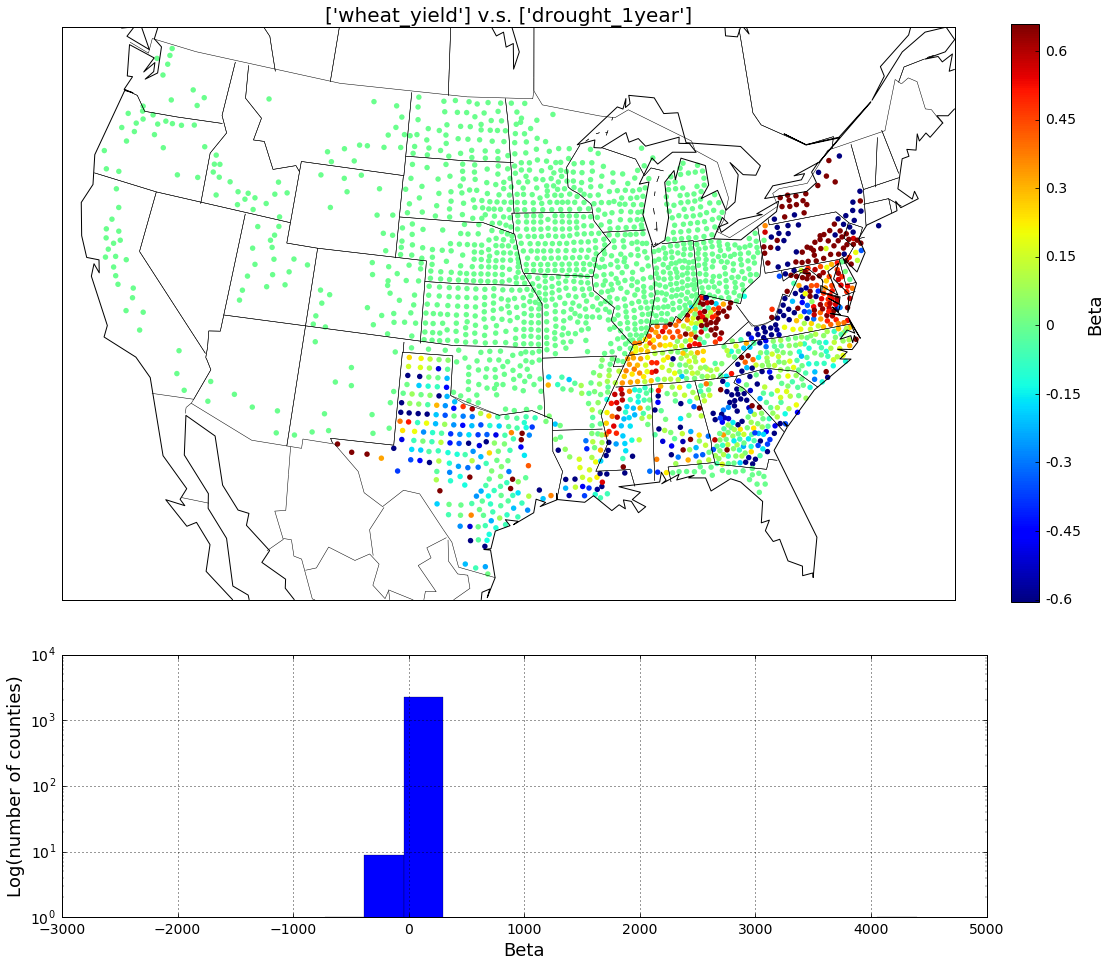

13


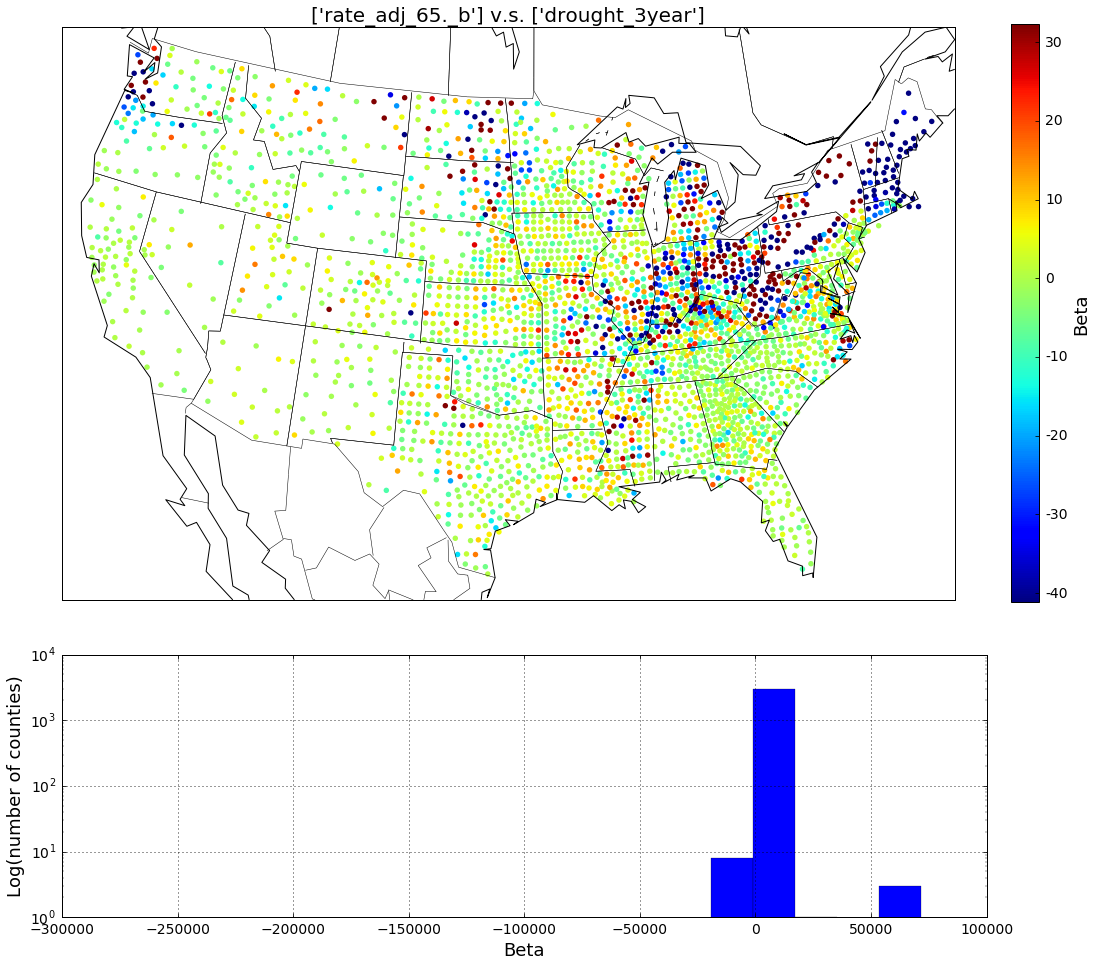

14


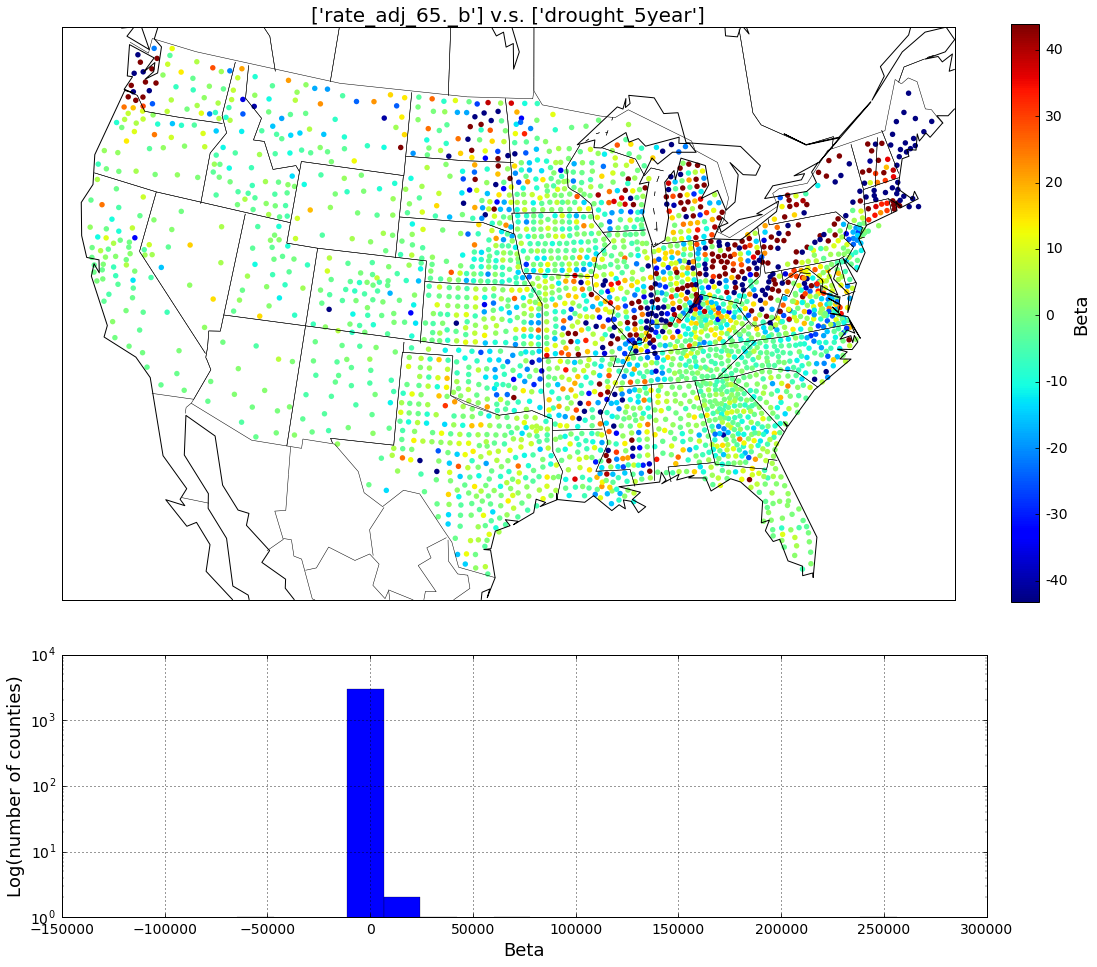

15


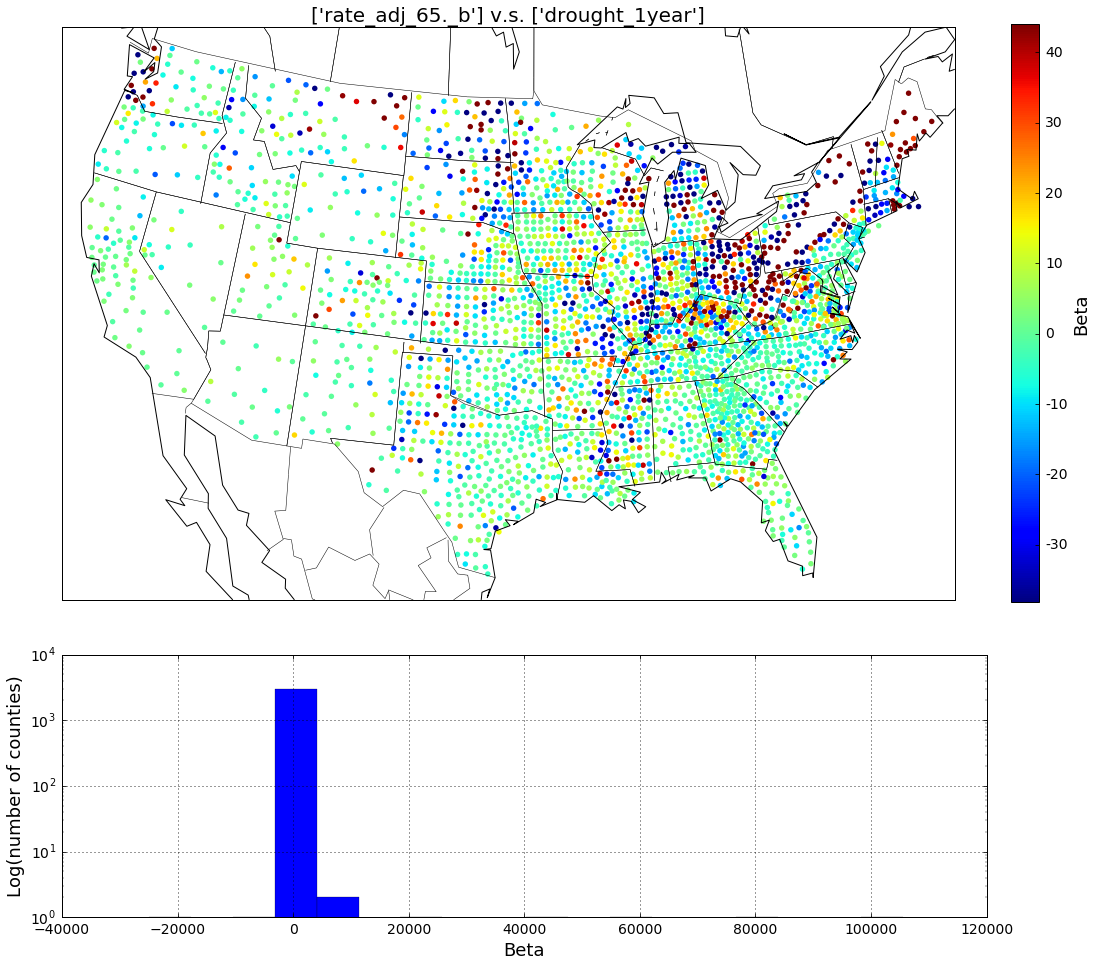

In [13]:
# combined = pd.DataFrame()
# combined = county_area*1
# combined = combined.merge(coeff,on='GISJOIN') # commented out if using the updated results from Anyd
for name in matching:
    r = int(name[name.find("r_")+2:name.find("_p")])
    p = int(name[name.find("p_")+2:])
    print(p)
    gs = gridspec.GridSpec(3, 6)
    plt.figure(figsize=(20,16))
    plt.subplot(gs[:2,:])
    # setup Lambert Conformal basemap.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    combined_clean = combined[['X','Y',name]].dropna()
    x,y = m(combined_clean['X'].values, combined_clean['Y'].values)
    m.scatter(x, y, s =30,c = combined_clean[name],cmap='jet',vmin=combined[name].quantile(0.05), vmax=combined[name].quantile(0.95),edgecolors ='None')
    # draw coastlines.
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
    c = plt.colorbar(orientation='vertical',format='%1.2g')
    c.set_label("Beta",fontsize=18)
    c.ax.tick_params(labelsize=14)
    plt.title("%s v.s. %s"%(name_list[r-1],name_list[p-1]),fontsize=20)
    plt.subplot(gs[-1,0:5])
    ax = combined_clean[name].hist(bins=20,log =True)
    ax.set_xlabel('Beta',fontsize=18)
    ax.set_ylabel('Log(number of counties)',fontsize=18)
    plt.savefig(r'..\..\paper\figures\updated\scatter_%s'%name,dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()

In [15]:
combined.describe().to_csv(r'..\..\paper\summary_stats_stage1.csv')